# ***Loading Dataset***

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

*mnist loads dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images*

In [2]:
# Loading Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Visualize some sample images
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(f"Label: {y_train[i]}")
    plt.show()

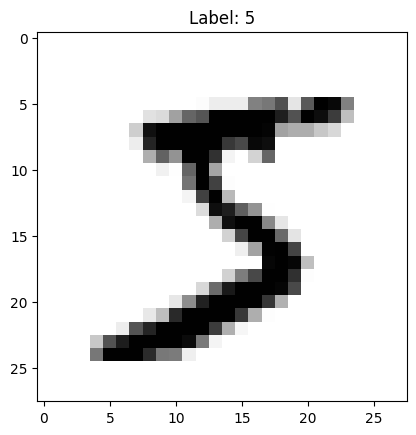

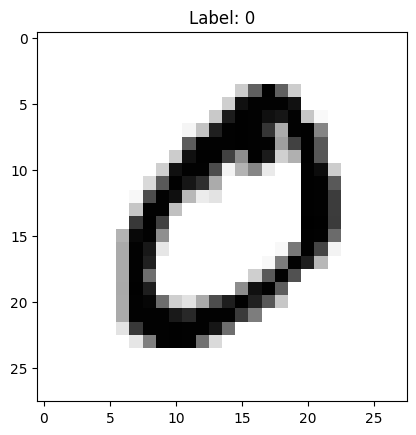

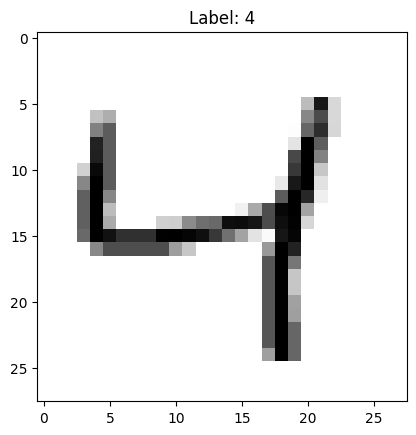

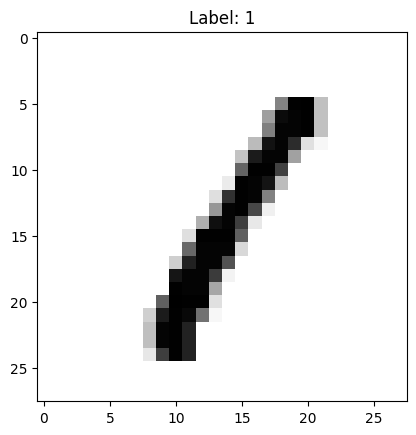

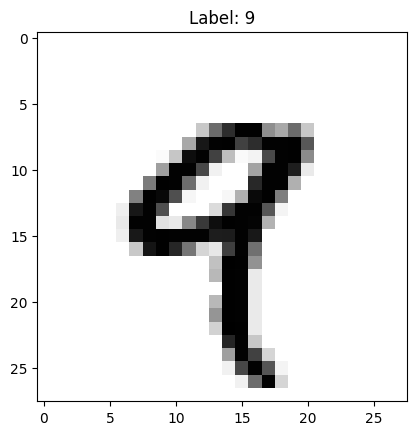

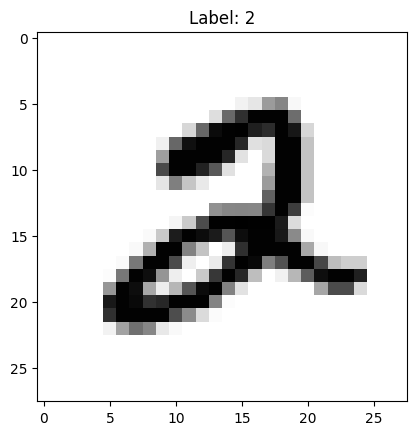

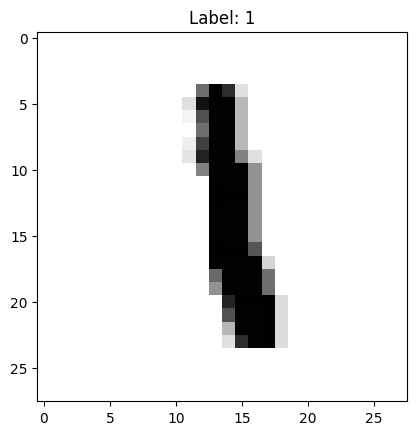

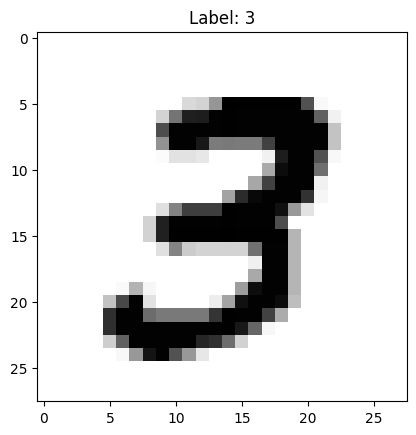

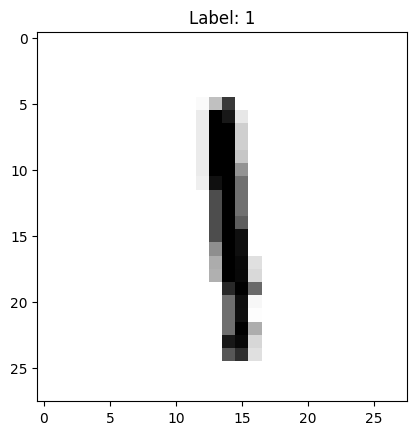

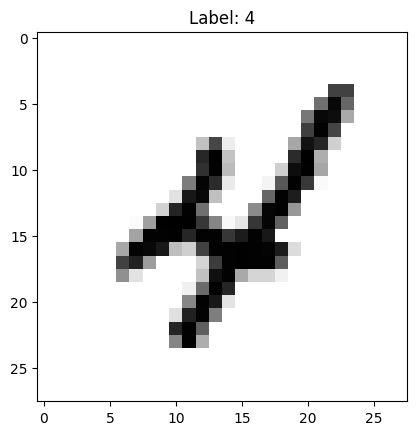

In [4]:
for i in range(10):  # Display first 10 images
    plot_input_img(i)

# ***Preprocessing***

In [5]:
# Normalize images
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [6]:
# Reshape to add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
# Convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# ***Model Creation***

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
# Define callbacks
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint("./bestmodel.keras", monitor='val_accuracy', verbose=1, save_best_only=True)
cb = [es, mc]

# ***Model Training***

In [11]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

# Train the model
his = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.3,
    callbacks=cb,
    batch_size=64
)


Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7947 - loss: 0.6472
Epoch 1: val_accuracy improved from -inf to 0.97150, saving model to ./bestmodel.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7948 - loss: 0.6467 - val_accuracy: 0.9715 - val_loss: 0.0978
Epoch 2/5
647/657 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.1185
Epoch 2: val_accuracy improved from 0.97150 to 0.97950, saving model to ./bestmodel.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9640 - loss: 0.1184 - val_accuracy: 0.9795 - val_loss: 0.0696
Epoch 3/5
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0818
Epoch 3: val_accuracy improved from 0.97950 to 0.98300, saving model to ./bestmodel.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9748 - loss: 0.0818 - val_accuracy: 0.9830 - val_loss: 0.0573
Epoch 4/5
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0673
Epoch 4: val_accuracy improved from 0.9

# ***Evaluation***

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.9879 - loss: 0.0408
Test accuracy: 0.99


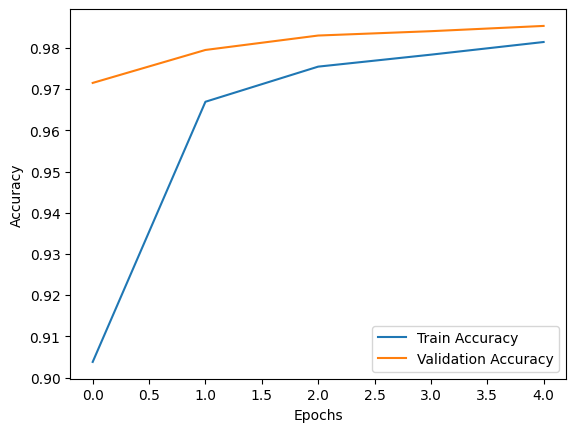

In [13]:
# Plot training history
plt.plot(his.history['accuracy'], label='Train Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ***Saving and running model***

In [14]:
model.save("final_model.keras")  # Save in Keras format (recommended)

In [15]:
# Install necessary libraries
!pip install gradio


AttributeError: module 'gradio' has no attribute 'inputs'

In [17]:

# Import required libraries
import gradio as gr
from keras.models import load_model
import numpy as np
import cv2

# Load the trained model
model = load_model("/content/final_model.keras")  # Ensure your model file is in the current directory

# Define the prediction function
def predict_digit(image):
    """
    Preprocess the image and predict the digit using the trained model.
    """
    if image is None:
        return "Please draw a digit on the canvas!"

    # Resize and normalize the input image
    image = cv2.resize(image, (28, 28))  # Resize to 28x28 pixels
    image = image.astype('float32') / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(image)
    digit = np.argmax(prediction)  # Get the predicted digit
    confidence = np.max(prediction)  # Confidence score

    return f"Predicted Digit: {digit}\nConfidence: {confidence:.2f}"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Sketchpad(label="Draw a Digit (0-9)"),  # Updated to use gr.Sketchpad
    outputs="text",
    title="Real-Time Handwritten Digit Recognition",
    description="""
    Draw a digit (0-9) in the canvas below, and the model will predict it in real-time!
    App created by **Syed Ali Ashar (UMT)**.
    """,
)

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d67bcac2927a5419aa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
